# RobustScaler 
- uses median and IQR to handle outliers while maintaing data's shape.
- scaling using median and quantile consists of sustracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:
- IQR = 75th quantile - 25th quantile
- x_scaled = (x - x.median) / IQR

In [1]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])

In [8]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


# Best way to do fit trnasform is to do it inside the DataFrame

In [3]:
scaler=RobustScaler()
df_robust=scaler.fit_transform(df)
pd.DataFrame(df_robust).head()

,0,1,2,3
0,0.0,0.0,-0.335664,-0.312011
1,1.0,-2.0,0.559441,2.461242
2,1.0,0.0,-0.111888,-0.282777
3,1.0,-2.0,0.391608,1.673732
4,0.0,0.0,0.391608,-0.277363


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

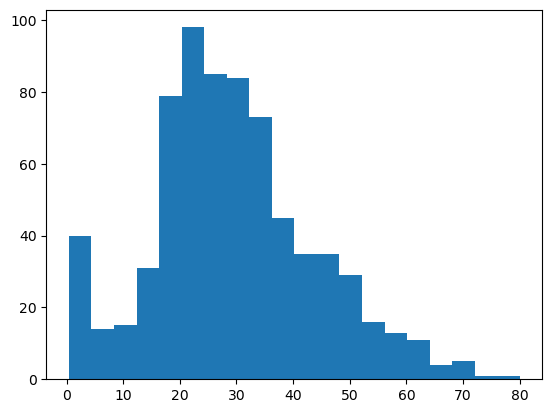

In [4]:
# Age before robust scaling
plt.hist(df["Age"],bins=20)

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([-1.54293706, -1.32033566, -1.09773427, -0.87513287, -0.65253147,
        -0.42993007, -0.20732867,  0.01527273,  0.23787413,  0.46047552,
         0.68307692,  0.90567832,  1.12827972,  1.35088112,  1.57348252,
         1.79608392,  2.01868531,  2.24128671,  2.46388811,  2.68648951,
         2.90909091]),
 <BarContainer object of 20 artists>)

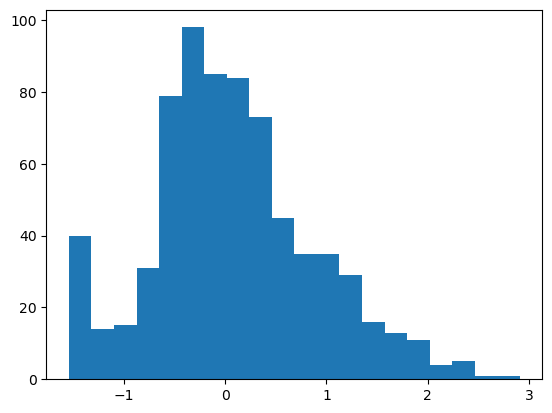

In [9]:
# Age after transformation
plt.hist(df_robust[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

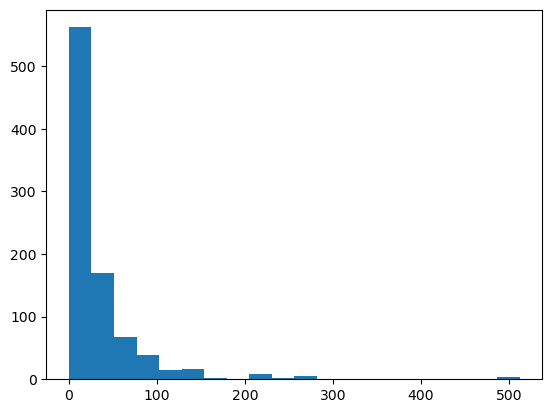

In [10]:
# survived before the robust scaling
plt.hist(df['Fare'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

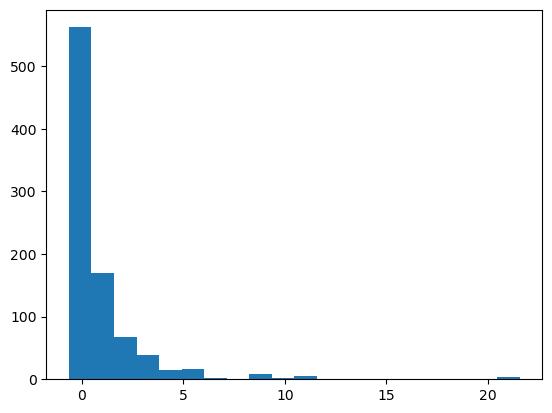

In [11]:
# fare after robust transformation
plt.hist(df_robust[:,3],bins=20)